<a href="https://colab.research.google.com/github/beafreitasx/R/blob/master/Trabalho_topicosB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATE56 - TÓPICOS B

***Alunos: Antonio de S. Cruz Neto; e Beatriz de J. Freitas;***
## **TRABALHO VALENDO NOTA**

- Grupos de no máximo 3 pessoas.
- Cada grupo deve procurar um conjunto de dados com no minimo 2000 linhas e 10 variaveis e com uma variável resposta do tipo binária. 
- Assim que encontrar o dataset, enviar pra mim pra eu dar um ok. 
- Objetivo: encontrar a melhor solução dentre os modelos que conhecemos para esse conjunto de dados
- Entregar o trabalho na forma de relatório feito no google colab (arquivo ipynb) 
- **Data de entrega: 15/11/2020**

- Sugestão de onde procurar conjunto de dados: kaggle

- Entregar anexando link ou arquivos no Google Classroom (tarefas)

- Objetivo: encontrar a melhor solução dentre os modelos que conhecemos para esse conjunto de dados.



# *SOBREVIVENDO AO TITANIC*

O desafio de Machine Learning para prever a sobrvivencia de passageiros no Titanic é um dos mais clássicos, e parada quase que obrigatória para quem está começando a ingressar no mundo da Ciência de dados.
 
Quando pensamos no Titanic logo asossiamos sua imagem ao desastre que culminou em seu naufrágio e na morte de várias de pessoas. Considerado um grande avanço na epoca, o navio era tido como a mais segura e luxuosa embarcação que existia. Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, detinha cerca de 892 funcionários e poderia levar até 2435 passageiros divididos em três classes;
 
O "Inafundável" ganhou grande fama por ter afundado. E a partir desse acontecimento iremos explorar alguns dados existentes e disponibilizados em uma plataforma de competições de data science, o Kaggle: https://www.kaggle.com/


## 1. Definindo o Problema

O Grande desafio aqui é tentar prever se um determinado grupo de pessoas sobreviveria ao naufragio ocorrido em 15 de abril de 1912.

Usaremos também algumas tecnicas de análise de dados para verificar os fatores que realmente impactaram e serviram para definir a sobrevivencia de alguem. Sabemos que o desastre foi ainda maior pois não existiam boate salva-vidas para todos os passageiros, assim, foi necessario priorizar o embarque de mulheres e crianças nos botes exitentes.

Posteriormente, também será possivel saber se você sobreviveria. Vamos começar?


## 2. Obtendo os Dados
Iremos trabalhar com dois arquivos que são disponibilizados pelo kaggle:

1. Dados para Treino do modelo; (train)
2. Dados para teste/prova do modelo; (test)

obs: Também é disponibilizado um modelo 'gabarito' (gender_submission).

Os dados e outras informações sobre o desafio podem ser encontradas em: 
https://www.kaggle.com/c/titanic



## 3. Instalando bibliotecas e dados


In [111]:
#Instalando biblitecas usadas
install.packages("ggthemes")
install.packages(('corrplot'))
install.packages('randomForest')
install.packages('plyr')
install.packages('mice')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [112]:
#Instalando biblitecas usadas
library('ggplot2')
library('ggthemes')
library('scales')
library('dplyr')
library('randomForest')
library('corrplot')
library('plyr')
library('mice') # imputation


In [113]:
#Importando os dados e armazendando na variável correspondente
train = read.csv('https://raw.githubusercontent.com/antoniocruzds/Estudos/master/R/Titanic_R/train.csv') #treino
test = read.csv("https://raw.githubusercontent.com/antoniocruzds/Estudos/master/R/Titanic_R/test.csv") #teste

In [114]:
#verificando os dados de treino (train)
test

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,,C


## 4. Entendendo os Dados
O conjunto de dados apresenta 12 tipos de variáveis, sendo elas:

Variavel|Definição|Chave
---|---|---| 
PassengerId| Número de identificação do passageiro| 
Survived| Informa se o passageiro sobreviveu ao desastre| 0 = Não;  1 = Sim
Pclass| Classe do bilhete| 1 = 1ª Classe;  2 = 2ª Classe;  3 = 3ª Classe
Name| Nome do passageiro
Sex| Sexo do passageiro
Age| Idade do passageiro
SibSp| Quantidade de cônjuges e irmãos a bordo
Parch| Quantidade de pais e filhos a bordo
Ticket| Número da passagem
Fare| Preço da Passagem
Cabin| Número da cabine do passageiro
Embarked| Porto no qual o passageiro embarcou| C = Cherbourg; Q = Queenstown; S = Southampton;


## 5. Analise exploratória

In [115]:
#Unindo as duas bases de dados
titanic <- bind_rows(train, test)

#Verificando
titanic

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


In [116]:
#Verificando dados faltantes
colSums(is.na(titanic)|titanic=='')

PassengerId    Survived      Pclass        Name         Sex         Age 
          0         418           0           0           0         263 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           1        1014           2

In [117]:
#verificando dados estatisticos das variáveis
summary(titanic)

  PassengerId      Survived          Pclass          Name          
 Min.   :   1   Min.   :0.0000   Min.   :1.000   Length:1309       
 1st Qu.: 328   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median : 655   Median :0.0000   Median :3.000   Mode  :character  
 Mean   : 655   Mean   :0.3838   Mean   :2.295                     
 3rd Qu.: 982   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1309   Max.   :1.0000   Max.   :3.000                     
                NA's   :418                                        
     Sex                 Age            SibSp            Parch      
 Length:1309        Min.   : 0.17   Min.   :0.0000   Min.   :0.000  
 Class :character   1st Qu.:21.00   1st Qu.:0.0000   1st Qu.:0.000  
 Mode  :character   Median :28.00   Median :0.0000   Median :0.000  
                    Mean   :29.88   Mean   :0.4989   Mean   :0.385  
                    3rd Qu.:39.00   3rd Qu.:1.0000   3rd Qu.:0.000  
                    Max.   :80.00   Max.  

Vamos começar analisando a porcentagem de sobreviventes por sexo. Sabemos que a grande maioria das pessoas que sobreviveram era do sexo feminino, mas agora analisaremos essa informação sobre os dados de treino de nosso dataset;
 ### Sobrevivencia por Sexo:


In [118]:
#Convertendo a variavel sobrevivencia em fator para melhores resultados
train$Survived <- as.factor(train$Survived)

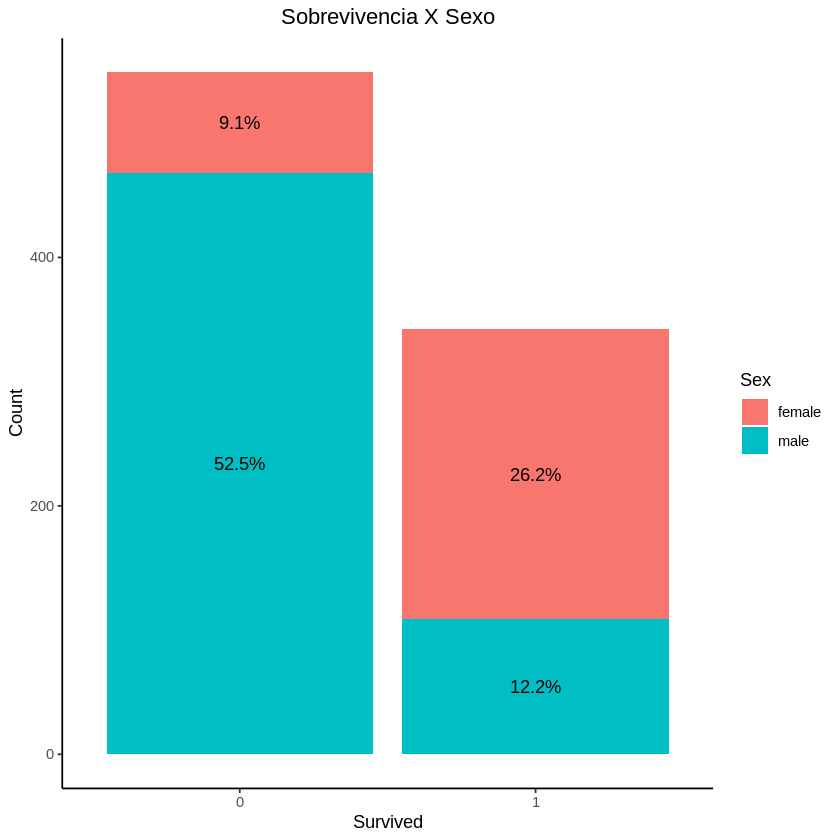

In [119]:
#Plotando um grafico de sobrevivencia por sexo (0 = morreu, 1 = sobreviveu)
ggplot(data = train, aes(x = Survived, fill = Sex)) +
  geom_bar() +
  geom_text(aes(label = scales::percent(..count.. / sum(..count..))), stat = 'count', position = position_stack(0.5)) +
  ggtitle("Sobrevivencia X Sexo") + xlab("Survived") + ylab ("Count") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5))

De fato, assim como no Titanic, podemos observar que a maior parte dos homemes morreram. 

### Sobrevivencia por Idade
Agora analisaremos a variável de idade. Primeiro vamos verificar como ela está distribuida:


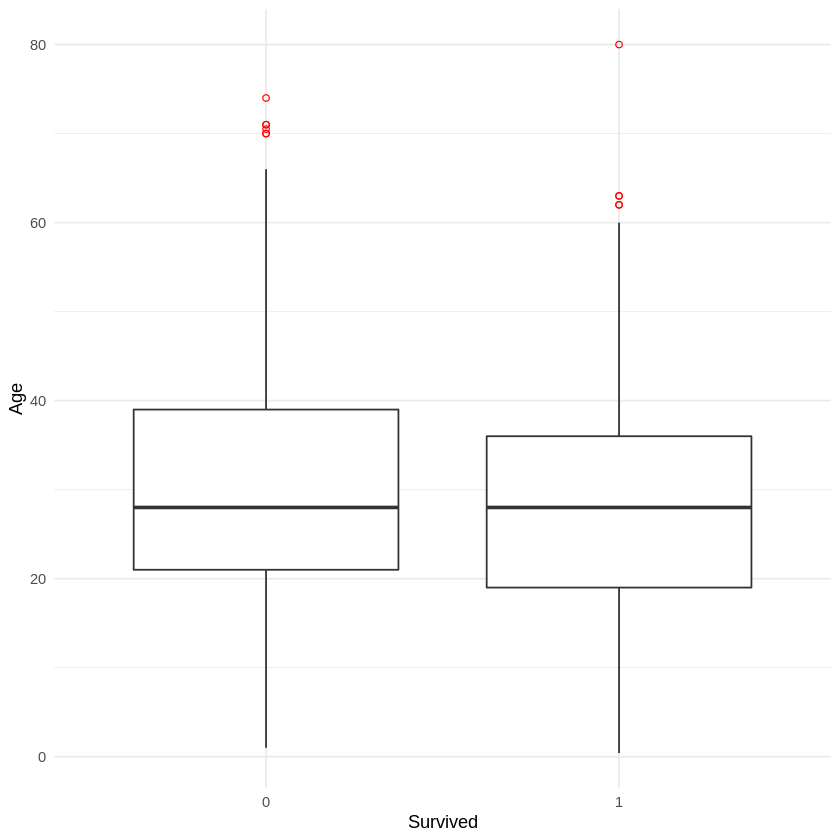

In [120]:
#Plotando um boxplot da idade 
ggplot(na.omit(train), aes(Survived, Age)) +
  geom_boxplot(outlier.color = "red", outlier.shape = 1) +
  theme_minimal()

Aqui verificamos que a maior parte dos passageiros tinha idade entre aproximadamente 21 e 39 anos; Com mediana em aproximadamente 28 anos;



Agora iremos verificar a relação dentre idade e sobrvivencia

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


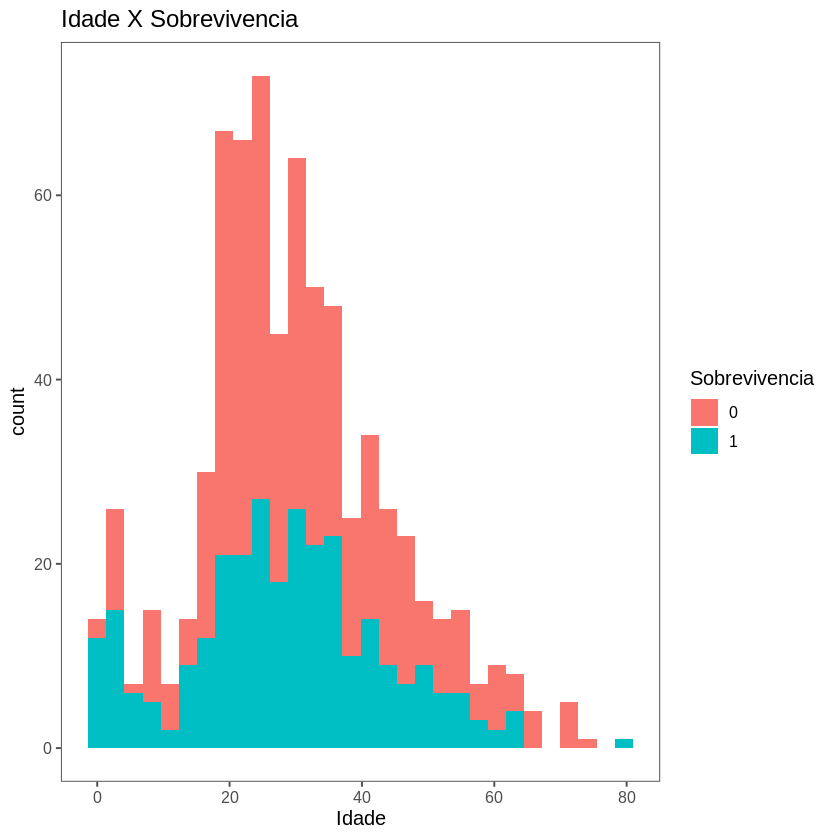

In [121]:
ggplot(data = train, aes(Age, fill = factor(Survived))) + 
  geom_histogram(bins=30) + 
  theme_few() +
  xlab("Idade") +
  scale_fill_discrete(name = "Sobrevivencia") + 
  ggtitle("Idade X Sobrevivencia")

Vemos que existe uma grande parte da consentração de mortos e sobreviventes ente 18 e 39 anos

Vamos ver essa distribuição também por sexo:


Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”


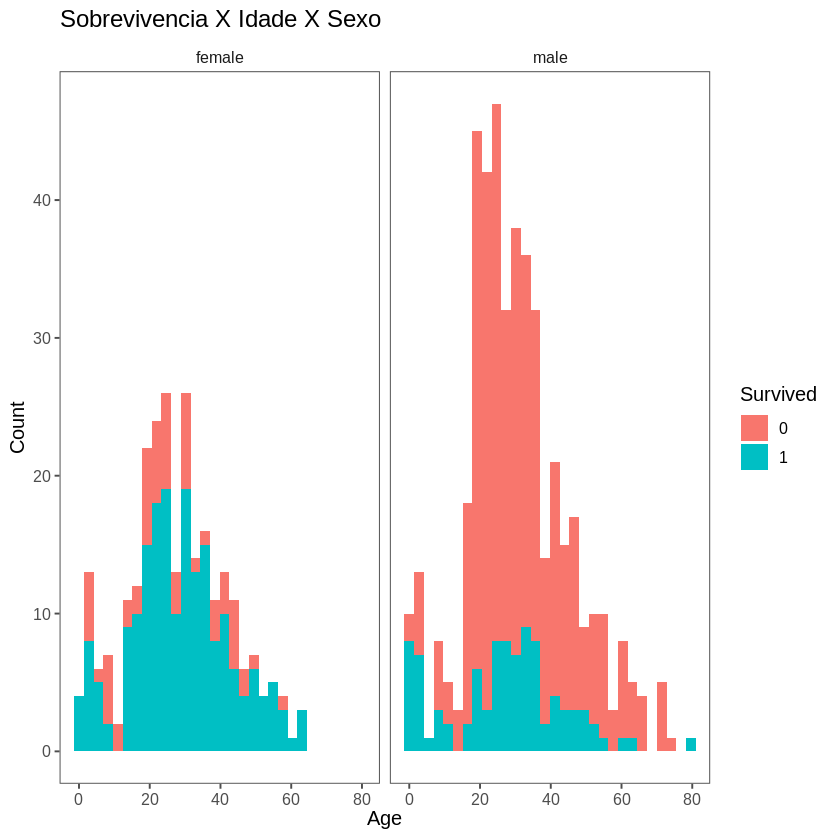

In [122]:
#Plotando um grafico de sobrevivencia por idade, em cada sexo:
ggplot(data = train, aes(Age, fill = factor(Survived))) + 
  geom_histogram(bins=30) + 
  theme_few() +
  xlab("Age") +
  ylab("Count") +
  facet_grid(.~Sex)+
  scale_fill_discrete(name = "Survived") + 
  theme_few()+
  ggtitle("Sobrevivencia X Idade X Sexo")

### Sobrevivencia por Classe
Agora veremos a influencia que a classe exerceu na sobrevivencia do passageiro:


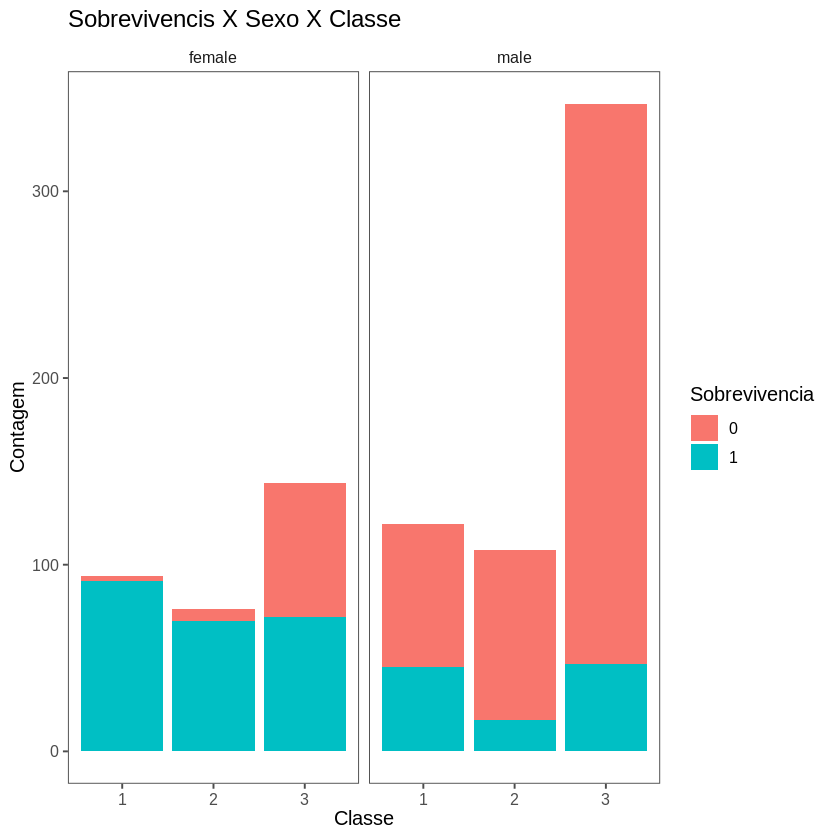

In [123]:
ggplot(data = train, aes(Pclass, fill = factor(Survived))) + 
  geom_bar(stat = "count")+
  theme_few() +
  xlab("Classe") +
  facet_grid(.~Sex)+
  ylab("Contagem") +
  scale_fill_discrete(name = "Sobrevivencia") + 
  ggtitle("Sobrevivencis X Sexo X Classe")

Já separado por sexo, percebemos que a classe teve sim uma influencia na sobrevivencia dos passageiros. 

Quase todas as mulheres da primeira e segunda classe sobreviveram, e menos da metade da terceira morreu.
Já para os homens vemos que a os sobreviventes foram mais frequentes na primeira e na terceira classe.

### Sobrevivencia por local de embarque
Sabemso que houveram 3 locais de embarque para o titanic: C = Cherbourg; Q = Queenstown; S = Southampton;

Agora veremos a relação de sobrevivencia das pessoas que embarcaram em cada um:

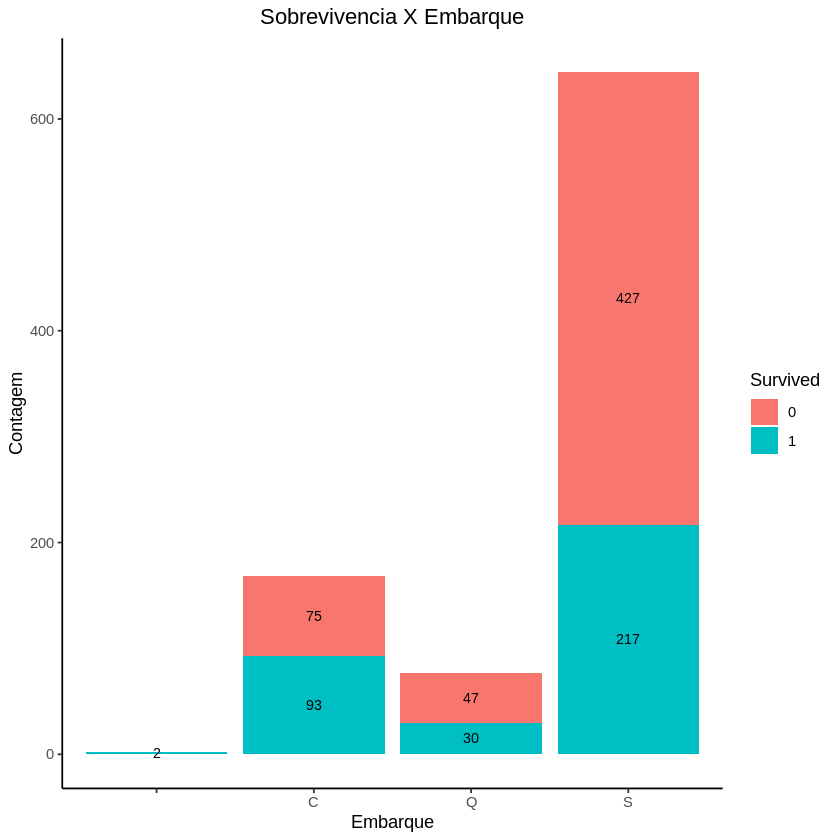

In [124]:
#Plotando um grafico da relação de sobrevivencia por local de embarque
ggplot(data = train, aes(x = Embarked, fill=Survived)) +
  geom_bar()+
  geom_text(stat='count', aes(label=..count..), position = position_stack(vjust = 0.5), size=3) +
  labs(title = "Sobrevivencia X Embarque", x = "Embarque", y = "Contagem") +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5))

O gráfico  mostra que a maioria dos passageiros embarcaram em Southampton e mais de 50% deles não sobreviveram. 


## 6. Arrumando Variáveis
Nessa etapa criaremos novas variaveis, tornaremos algumas que já exestem em variáveis binarias, e eliminaremos outras, afim de facilitar na hora de implementar os modelos

### Excluindo variáveis
Vamos desconsiderar as variáveis ['PassengerId', 'Name', 'Ticket', 'Cabin'], pois **aparentemente** não parecem relevantes.

In [125]:
titanic

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


aqui vamos remover as colunas 1,4,9,11; que correspondem às variáveis que não iremos sar

In [126]:
#Removendo as colunas
titanic = titanic[,-c(1,4,9,11)]

### Valores faltantes
Vamos olhar os valores faltantes (NaN) e preencher esses valores usando média, mediana, valor mais frequente;

In [127]:
colSums(is.na(titanic)|titanic=='')

Survived   Pclass      Sex      Age    SibSp    Parch     Fare Embarked 
     418        0        0      263        0        0        1        2

Para as variáveis idade e tarifa (age, fare), vamos colocar o valor da mediana, e para a variável de embarque,a moda.



In [128]:
#Idade -> substituimos pema mediana
titanic <- 
  titanic %>%
  mutate(Age = ifelse(is.na(Age), mean(Age, na.rm=TRUE), Age))

In [129]:
#Fare -> substituimos pema mediana
titanic <- 
  titanic%>%
  mutate(Fare = ifelse(is.na(Fare), mean(Fare, na.rm=TRUE), Fare))

In [130]:
#Embarked -> substituimos pema moda
titanic <- 
  titanic%>%
  mutate(Embarked = ifelse(is.na(Embarked), mode(Embarked, na.rm=TRUE), Embarked))

In [131]:
#Verificando
colSums(is.na(titanic)|titanic=='')

Survived   Pclass      Sex      Age    SibSp    Parch     Fare Embarked 
     418        0        0        0        0        0        0        2

Agora só ficamos com os dados faltantes na variavel Survived, que é a que queremos prever

### Convertendo Variáveis
Agora iremos transformar algumas variaveis em binarias (0 e 1) e numeriacas em geral

In [132]:
#Convertendo váriavel de Sex de texto para binário

#Se male = 1
# Se female = 0

titanic <- 
  titanic%>%
  mutate(Sex = ifelse(Sex == "male", 1 , 0 ))



In [133]:
#visualizando a coluna Sex 
unique(titanic$Sex)

titanic


[1] 1 0

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
0,3,1,22.00000,1,0,7.2500,S
1,1,0,38.00000,1,0,71.2833,C
1,3,0,26.00000,0,0,7.9250,S
1,1,0,35.00000,1,0,53.1000,S
0,3,1,35.00000,0,0,8.0500,S
0,3,1,29.88114,0,0,8.4583,Q
0,1,1,54.00000,0,0,51.8625,S
0,3,1,2.00000,3,1,21.0750,S
1,3,0,27.00000,0,2,11.1333,S


In [ ]:
titanic$Embarked

In [144]:
#Convertendo váriavel de Embarked de texto para Dummies porque existem mais de 
#valores diferentes, a função Dummies cria uma nova coluna para cada valor

titanic <- titanic %>% 
  fastDummies::dummy_cols(., 
                          select_columns = "Embarked")




In [ ]:
titanic

## 7. Aplicando modelos

In [148]:
#instalar pacotes

library(tidyverse)

install.packages("tidymodels")

library(tidymodels)

library (MASS)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ purrr   0.3.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ plyr::arrange()         masks dplyr::arrange()
✖ readr::col_factor()     masks scales::col_factor()
✖ randomForest::combine() masks dplyr::combine()
✖ purrr::compact()        masks plyr::compact()
✖ plyr::count()           masks dplyr::count()
✖ purrr::discard()        masks scales::discard()
✖ plyr::failwith()        masks dplyr::failwith()
✖ dplyr::filter()         masks stats::filter()
✖ plyr::id()              masks dplyr::id()
✖ dplyr::lag()            masks stats::lag()
✖ randomForest::margin()  masks ggplot2::margin()
✖ plyr::mutate()          masks dplyr::mutate()
✖ plyr::rename()          masks dplyr::rename()
✖ plyr::summarise()       masks dplyr::summarise()
✖ plyr::summarize()       masks dplyr::summarize

In [149]:
#Recuperando os dados de treino e teste
train <- titanic[1:891,]
test <- titanic[892:1309,]

In [ ]:
#Verificando
test

In [153]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_,Embarked_C,Embarked_Q,Embarked_S
,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<int>
1,0,3,1,22.00000,1,0,7.2500,S,0,0,0,1
2,1,1,0,38.00000,1,0,71.2833,C,0,1,0,0
3,1,3,0,26.00000,0,0,7.9250,S,0,0,0,1
4,1,1,0,35.00000,1,0,53.1000,S,0,0,0,1
5,0,3,1,35.00000,0,0,8.0500,S,0,0,0,1
6,0,3,1,29.88114,0,0,8.4583,Q,0,0,1,0
7,0,1,1,54.00000,0,0,51.8625,S,0,0,0,1
8,0,3,1,2.00000,3,1,21.0750,S,0,0,0,1
9,1,3,0,27.00000,0,2,11.1333,S,0,0,0,1


In [ ]:
# Pré-Processamento

dados_pre <- train %>% 
  recipe(Survived ~ .) %>% # define a funçao de treino
  step_normalize(all_numeric()) %>%
  prep()

juice(dados_pre) # visualizando dados pré-processados

In [ ]:
# Criando banco de dados pre-processado

bake(dados_pre, new_data = train)

In [156]:
#Crias as especificações dos modelos

#Knn
knn_spec <- nearest_neighbor() %>% 
  set_engine("kknn") %>% 
  set_mode("regression")

#Arvore de decisão
decision_spec <- decision_tree() %>% 
  set_engine("rpart") %>% 
  set_mode("regression")

#Naive Bayes
bayes_spec = logistic_reg() %>%
  set_engine(engine = "stan", 
             prior_intercept = prior.dist, 
             prior = prior.dist) %>%
  set_mode(mode = "classification")

#Random Forests
rand_spec <- rand_forest() %>% 
  set_engine("ranger") %>% 
  set_mode("classification")

#Logistic Regression
logistic_spec <- logistic_reg() %>% 
  set_engine("glm") %>% 
  set_mode("classification")



In [ ]:
# Validação cruzada   -> K Folds

validation <- vfold_cv(juice(dados_pre), 
                       v = 5, repeats = 1, 
                       prep = TRUE)

validation

### Aplicando Regressão Logística 

In [ ]:
#Aplicando modelo Regressão logistica 

logistic_regression <- fit_resamples(Survived ~ ., 
                           logistic_spec, 
                           validation, 
                           control = control_resamples(save_pred = TRUE))

logistic_regression


In [ ]:
titanic <- titanic %>% 
mutate(Survived = as.factor(Survived))

In [167]:
# Métricas da Regressão logistica 

logistic_regression %>% 
  dplyr::select(id, .metrics) %>% 
  unnest(.metrics) %>% 
  filter(.metric == "rmse")

logistic_metrics <- logistic_regression %>% 
  collect_metrics() %>% 
  mutate(model = "Logistic Regression") %>% 
  filter(.metric == "rmse")


ERROR: ignored

### Aplicando KNN

In [ ]:
# Aplicando modelo Knn

install.packages("kknn")

knn_model <- fit_resamples(Survived ~ ., 
                          knn_spec, 
                          validation, 
                          control = control_resamples(save_pred = TRUE))

knn_model

In [160]:
knn_model %>% 
  dplyr::select(id, .metrics) %>% 
  unnest(.metrics) %>% 
  filter(.metric == "rmse")

knn_metrics <- knn_model %>% 
  collect_metrics() %>% 
  mutate(model = "Knn Model") %>% 
  filter(.metric == "rmse")

id,.metric,.estimator,.estimate
<chr>,<chr>,<chr>,<dbl>
Fold1,rmse,standard,0.8447793
Fold2,rmse,standard,0.7857360
Fold3,rmse,standard,0.8454479
Fold4,rmse,standard,0.8293876
Fold5,rmse,standard,0.8282203


In [161]:
# Retornar Parametros do modelo knn: 

knn_fit <- knn_spec %>% 
  fit(Survived ~ ., 
      data = juice(dados_pre))

knn_fit

parsnip model object

Fit time:  26ms 

Call:
kknn::train.kknn(formula = Survived ~ ., data = data, ks = min_rows(5,     data, 5))

Type of response variable: continuous
minimal mean absolute error: 0.4885217
Minimal mean squared error: 0.6674823
Best kernel: optimal
Best k: 5

### Aplicando Árvore de decisão

In [ ]:
#Aplicando modelo Arvore de decisão 

install.packages("rpart")
install.packages("rpart.plot")
library(rpart.plot)

decision_model <- fit_resamples(Survived ~ ., 
                           decision_spec, 
                           validation, 
                           control = control_resamples(save_pred = TRUE))

decision_model

In [163]:
# Métricas da árvore de decisão:

decision_model %>% 
  dplyr::select(id, .metrics) %>% 
  unnest(.metrics) %>% 
  filter(.metric == "rmse")

decision_metrics <- decision_model %>% 
  collect_metrics() %>% 
  mutate(model = "Decision Model") %>% 
  filter(.metric == "rmse")


ERROR: ignored